### Model
- MLP
- GBDT
- GRU
- AGRU
- Ensemble

In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from math import sqrt
import numpy as np
import pandas as pd
import warnings
import xgboost as xgb
import copy

# Suppress the warning
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

path = 'D:\\AI_data_analysis\\CY\\'

### Load data 

In [2]:
price_processed = pd.read_csv(path + 'price_processed.csv',
                              parse_dates=["trade_date"])

X_indexes = ['OPEN_processed',
             'HIGH_processed', 
             'LOW_processed', 
             'CLOSE_processed', 
             'VWAP_processed',
             'VOLUME_processed']
price_X_all = price_processed[X_indexes].values

price_return = pd.read_csv(path + 'price_return.csv',
                           parse_dates=['trade_date'],
                           index_col='trade_date')

# Factor dataframe

MLP_factor_df = pd.read_csv(path + 'MLP_factor_df.csv',
                            parse_dates=['trade_date'],
                            index_col='trade_date')
GBDT_factor_df = pd.read_csv(path + 'GBDT_factor_df.csv',
                            parse_dates=['trade_date'],
                            index_col='trade_date')
GRU_factor_df = pd.read_csv(path + 'GRU_factor_df.csv',
                            parse_dates=['trade_date'],
                            index_col='trade_date')
AGRU_factor_df = pd.read_csv(path + 'AGRU_factor_df.csv',
                            parse_dates=['trade_date'],
                            index_col='trade_date')

In [3]:
from sklearn.model_selection import train_test_split

trade_date = price_return.index
date_train, date_test = train_test_split(trade_date, test_size=0.2, shuffle=False)

In [4]:
date_train

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14',
               '2023-06-15', '2023-06-16', '2023-06-19', '2023-06-20',
               '2023-06-21', '2023-06-26'],
              dtype='datetime64[ns]', name='trade_date', length=599, freq=None)

In [5]:
date_test

DatetimeIndex(['2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30',
               '2023-07-03', '2023-07-04', '2023-07-05', '2023-07-06',
               '2023-07-07', '2023-07-10',
               ...
               '2024-01-18', '2024-01-19', '2024-01-22', '2024-01-23',
               '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-29',
               '2024-01-30', '2024-01-31'],
              dtype='datetime64[ns]', name='trade_date', length=150, freq=None)

### ICIR dataframe

- Calculate factors for all stocks daily.
- Computer last 60 days' ICIR for test dataset.

#### Load Models

In [6]:
# # MLP
# MLP_model = tf.keras.models.load_model(path + 'MLP_save.keras', custom_objects={})

# # Compile the model
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
# MLP_model.compile(optimizer=optimizer, loss='mean_squared_error')

In [7]:
# # Define a custom function to create the Dense layer with the same configuration
# # Define the CustomDenseLayer class
# class CustomDenseLayer(tf.keras.layers.Layer):
#     def __init__(self, units=128, activation="relu", **kwargs):
#         super(CustomDenseLayer, self).__init__(**kwargs)
#         self.units = units
#         self.activation = tf.keras.activations.get(activation)

#     def build(self, input_shape):
#         self.kernel = self.add_weight(
#             "kernel",
#             shape=(input_shape[-1], self.units),
#             initializer="glorot_uniform",
#             trainable=True,
#         )
#         self.bias = self.add_weight(
#             "bias", shape=(self.units,), initializer="zeros", trainable=True
#         )

#     def call(self, inputs):
#         return self.activation(tf.matmul(inputs, self.kernel) + self.bias)


# # Load the model using custom_objects argument
# MLP_model = tf.keras.models.load_model(
#     path + 'MLP.keras', custom_objects={"custom_dense_layer": CustomDenseLayer}
# )

In [8]:
# XGBoost model
# GBDT_model = xgb.Booster()
# GBDT_model.load_model(path + 'Xgboost.model')

In [9]:
# GRU model

In [10]:
# AGRU model
# AGRU_model = load_model(path + 'AGRU_model.keras')

#### MLP Predict

In [11]:
# y_pred_MLP_all = np.load(path + 'y_pred_MLP_all.npy')

# MLP_factor_all = price_processed[['trade_date', 'ts_code']] # Date and stock
# MLP_factor_all.loc[:, 'MLP'] = y_pred_MLP_all # Add factor values
# MLP_factor_all = MLP_factor_all.pivot(index='trade_date', 
#                       columns='ts_code', 
#                       values='MLP') # Transfer to factor dataframe
# # ICIR
# IC_series_MLP = MLP_factor_all.corrwith(price_return, 
#                                          axis=1,
#                                          method='spearman')
# MLP_ICIR = IC_series_MLP.shift(1).rolling(60).apply(lambda x: x.mean() / x.std())
# MLP_ICIR = MLP_ICIR[MLP_ICIR.index.isin(date_test)]

#### GBDT Predict

In [12]:
# Use the loaded XGBoost model for prediction
# loaded_all = xgb.DMatrix(price_X_all)
# y_pred_GBDT_all = GBDT_model.predict(loaded_all)

# GBDT_factor_all = price_processed[['trade_date', 'ts_code']] # Date and stock
# GBDT_factor_all.loc[:, 'GBDT'] = y_pred_GBDT_all # Add factor values
# GBDT_factor_all = GBDT_factor_all.pivot(index='trade_date', 
#                       columns='ts_code', 
#                       values='GBDT') # Transfer to factor dataframe
# # ICIR
# IC_series_GBDT = GBDT_factor_all.corrwith(price_return, 
#                                          axis=1,
#                                          method='spearman')
# GBDT_ICIR = IC_series_GBDT.shift(1).rolling(60).apply(lambda x: x.mean() / x.std())
# GBDT_ICIR = GBDT_ICIR[GBDT_ICIR.index.isin(date_test)]

#### GRU Predict

In [13]:
# y_pred_GRU_all = GRU_model.predict(price_X_all)

#### AGRU Predict

In [14]:
# y_pred_AGRU_all = AGRU_model.predict(price_X_all)
# y_pred_AGRU_all = np.load(path + 'y_pred_AGRU_all.npy')
# AGRU_factor_all = price_processed[['trade_date', 'ts_code']].iloc[57594:, :] # Date and stock
# AGRU_factor_all.loc[:, 'AGRU'] = y_pred_AGRU_all # Add factor values
# AGRU_factor_all = AGRU_factor_all.pivot(index='trade_date', 
#                       columns='ts_code', 
#                       values='AGRU') # Transfer to factor dataframe
# # ICIR
# IC_series_AGRU = AGRU_factor_all.corrwith(price_return, 
#                                          axis=1,
#                                          method='spearman')
# AGRU_ICIR = IC_series_AGRU.shift(1).rolling(60).apply(lambda x: x.mean() / x.std())
# AGRU_ICIR = AGRU_ICIR[AGRU_ICIR.index.isin(date_test)]
# AGRU_ICIR.to_csv(path + 'AGRU_ICIR.csv')

#### Load ICIR

In [15]:
MLP_ICIR = pd.read_csv(path + 'MLP_ICIR.csv',
                          parse_dates=['trade_date'],
                          index_col=['trade_date'])
MLP_ICIR = abs(MLP_ICIR['0'])

GBDT_ICIR = pd.read_csv(path + 'GBDT_ICIR.csv',
                          parse_dates=['trade_date'],
                          index_col=['trade_date'])
GBDT_ICIR = abs(GBDT_ICIR['0'])

# GRU_ICIR = pd.read_csv(path + 'GRU_ICIR.csv',
#                           parse_dates=['trade_date'],
#                           index_col=['trade_date'])
# GRU_ICIR = GRU_ICIR['0']

AGRU_ICIR = pd.read_csv(path + 'AGRU_ICIR.csv',
                          parse_dates=['trade_date'],
                          index_col=['trade_date'])
AGRU_ICIR = abs(AGRU_ICIR['0'])

### Ensemble Model

In [16]:
SUM_ICIR = MLP_ICIR + GBDT_ICIR + AGRU_ICIR
MLP_ratio = MLP_ICIR / SUM_ICIR
GBDT_ratio = GBDT_ICIR / SUM_ICIR
AGRU_ratio = AGRU_ICIR / SUM_ICIR

MLP_weight = MLP_factor_df.multiply(MLP_ratio, axis=0)
GBDT_weight = GBDT_factor_df.multiply(GBDT_ratio, axis=0)
AGRU_weight = AGRU_factor_df.multiply(AGRU_ratio, axis=0)

Ensemble_factor_df = MLP_weight + GBDT_weight + AGRU_weight

In [17]:
Ensemble_factor_df

,000001.SZ,000002.SZ,000004.SZ,000006.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,601919.SH,601933.SH,601939.SH,601958.SH,601988.SH,601989.SH,601991.SH,601992.SH,601998.SH,601999.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2023-06-27,-0.092649,0.000859,0.065679,0.077415,0.051095,-0.082241,0.044474,0.130143,-0.027243,-0.125542,...,-0.128882,0.039130,-0.124472,-0.047510,-0.069810,-0.067588,-0.059050,0.027115,-0.067768,0.006397
2023-06-28,-0.076000,-0.120367,0.021428,0.059659,0.043725,-0.029656,0.064299,0.120621,0.012905,-0.076228,...,-0.091568,0.036191,-0.088970,-0.078749,-0.125479,-0.092728,-0.048680,-0.023568,-0.010998,0.049638
2023-06-29,-0.066668,-0.176183,-0.458238,0.032730,0.066490,-0.091251,0.126548,0.072572,0.003990,-0.055429,...,-0.047977,0.066497,-0.097669,-0.074314,-0.104984,-0.047193,-0.087162,0.028984,-0.028628,0.010671
2023-06-30,-0.117908,0.028980,0.039356,0.035447,0.016701,-0.048917,0.018291,0.083346,-0.026049,-0.032667,...,-0.028881,0.082764,-0.039003,-0.042893,-0.145661,-0.164082,-0.006671,0.045720,0.000330,0.072201
2023-07-03,-0.111179,-0.057626,0.069793,0.053038,0.009498,-0.140520,0.028128,0.125783,0.003688,0.043700,...,-0.019402,0.052094,-0.017631,-0.058188,-0.149648,-0.117718,-0.075669,0.059980,-0.041608,0.042981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,-0.138112,-0.105228,0.020372,-0.011580,-0.006057,-0.075587,-0.012085,-0.061681,-0.027440,-0.013192,...,-0.112116,0.007195,-0.094328,0.007858,-0.028866,-0.006172,-0.031125,0.031913,-0.052351,0.003897
2024-01-26,-0.180687,-0.200760,0.009871,-0.058359,-0.022316,-0.112468,0.017572,-0.065918,-0.056852,-0.265682,...,-0.117039,-0.037722,-0.208289,-0.002185,-0.068633,-0.066326,-0.075384,-0.010654,-0.101833,0.000862
2024-01-29,-0.204854,-0.123299,0.033347,-0.026233,-0.020739,-0.107927,-0.037783,-0.097774,-0.020234,-0.044077,...,-0.110321,0.000010,-0.163821,-0.044715,-0.066676,-0.025202,-0.072108,0.014016,-0.165576,0.051935


### Back testing

In [18]:
price_test = pd.read_csv(path + 'price_test.csv',
                         parse_dates=["trade_date"])

In [19]:
price_return_test = pd.read_csv(path + 'price_return_test.csv',
                                parse_dates=['trade_date'],
                                index_col="trade_date")

In [20]:
HS_300_test = pd.read_csv(path + 'HS_300_test.csv',
                          parse_dates=["trade_date"],
                          index_col="trade_date")
HS_300_test = HS_300_test['000300.SH']

CS_500_test = pd.read_csv(path + 'CS_500_test.csv',
                          parse_dates=["trade_date"],
                          index_col="trade_date")
CS_500_test = CS_500_test['000905.SH']

CS_1000_test = pd.read_csv(path + 'CS_1000_test.csv',
                           parse_dates=["trade_date"],
                           index_col="trade_date")
CS_1000_test = CS_1000_test['000852.SH']

In [21]:
# layer number
num_layers = 20

# Calculte the ranks of factors daily.
factor_ranks = Ensemble_factor_df.rank(axis=1, ascending=False)

# The factor ordering is divided into num_layers, each of which allocates funds equally.
layer_allocation = (factor_ranks // (len(Ensemble_factor_df.columns) / num_layers)).fillna(0)
layer_allocation

,000001.SZ,000002.SZ,000004.SZ,000006.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,601919.SH,601933.SH,601939.SH,601958.SH,601988.SH,601989.SH,601991.SH,601992.SH,601998.SH,601999.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2023-06-27,17.0,10.0,2.0,1.0,3.0,17.0,4.0,0.0,13.0,19.0,...,19.0,5.0,18.0,15.0,16.0,16.0,16.0,6.0,16.0,9.0
2023-06-28,17.0,18.0,7.0,3.0,5.0,13.0,3.0,0.0,8.0,17.0,...,17.0,6.0,17.0,17.0,18.0,17.0,15.0,12.0,11.0,4.0
2023-06-29,15.0,19.0,19.0,7.0,3.0,16.0,0.0,3.0,10.0,15.0,...,14.0,3.0,17.0,16.0,17.0,14.0,16.0,7.0,13.0,9.0
2023-06-30,17.0,6.0,5.0,6.0,8.0,14.0,8.0,2.0,12.0,13.0,...,13.0,2.0,13.0,14.0,18.0,18.0,11.0,5.0,10.0,2.0
2023-07-03,17.0,15.0,2.0,4.0,9.0,18.0,7.0,0.0,10.0,5.0,...,12.0,4.0,12.0,15.0,18.0,17.0,16.0,3.0,14.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,19.0,18.0,6.0,10.0,10.0,17.0,10.0,16.0,13.0,11.0,...,18.0,8.0,18.0,8.0,13.0,10.0,13.0,5.0,15.0,8.0
2024-01-26,19.0,19.0,9.0,16.0,13.0,18.0,7.0,16.0,16.0,19.0,...,18.0,14.0,19.0,10.0,17.0,16.0,17.0,11.0,18.0,10.0
2024-01-29,19.0,18.0,4.0,12.0,12.0,18.0,14.0,18.0,12.0,14.0,...,18.0,9.0,19.0,14.0,16.0,12.0,17.0,7.0,19.0,2.0


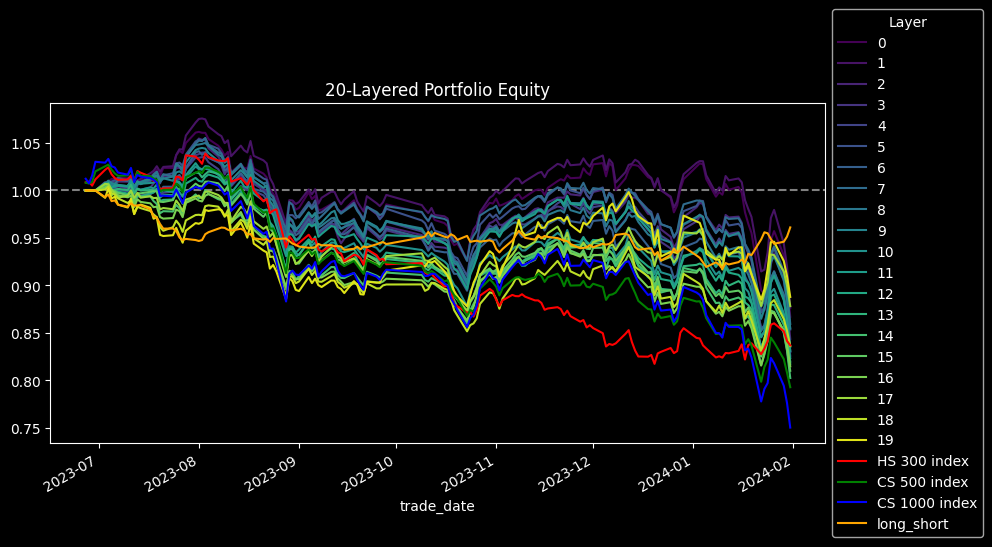

In [22]:
# import matplotlib.cm as cm

plt.rcParams['axes.unicode_minus'] = False # 正常显示负号
plt.figure(figsize=(10, 5))
plt.axhline(y=1, color='grey', linestyle='--')

# Define a color map to use for changing colors progressively
# colors = plt.cm.jet(np.linspace(0, 1, num_layers))

def Ensure_position(DF):
    # We add a column named 'Monday' and change positions every Monday.
    DF = DF.shift(1) # Move one step forward to ensure position
    DF["Monday"] = (DF.index.dayofweek == 0).astype(int) # Shift except Monday

    # Get the columns to shift (all columns except 'Monday')
    cols_to_shift = DF.columns[DF.columns != 'Monday']

    DF.loc[DF['Monday'] == 0, cols_to_shift] = np.nan
    DF.fillna(method='ffill', inplace=True) # Forward fill, holing positions for a week.
    DF.fillna(value=0, inplace=True) # Fill remaining NaN with 0
    return DF

profit_long = None
profit_short = None
def Long_Short(Num_layers, Layer, Profit):
    global profit_long, profit_short
    if Layer == 0:
        profit_short = Profit
        # The short profit comes from the decline of the stock.
        profit_short = profit_short.apply(lambda x: x + 1 if x == 0 else -x + (1 - 0.0003))
        profit_short = profit_short.cumprod()
        profit_short *= 0.5
    elif Layer == Num_layers - 1:
        profit_long = Profit
        profit_long = profit_long.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
        profit_long = profit_long.cumprod()
        profit_long *= 0.5

Long_position_df = None
for layer in range(0, num_layers):
    # Ensure holding stocks
    hold_flag_matrix = layer_allocation.mask(layer_allocation != layer, 0).mask(layer_allocation == layer, 1)
    hold_flag_matrix = Ensure_position(hold_flag_matrix)
    if layer == 0:
        Long_position_df = hold_flag_matrix.copy()

    # Delete 'Monday' to fit into yield dataframe.
    del hold_flag_matrix["Monday"]

    # Calculate the sum of each line in turn.
    stock_amount_sum = hold_flag_matrix.sum(axis=1)

    # Calculate the weight of each stock. (Average distribution at the same level)
    weight_allocation = hold_flag_matrix.apply(lambda x: x / stock_amount_sum, axis=0).fillna(0)

    # Calculate the daily profit rate. And prepare to calculate cumprod.
    profit = (weight_allocation * price_return_test).sum(axis=1)

    # Create Long and Short position
    Long_Short(num_layers, layer, profit)

    # Calculate the daily equity and draw.
    # Using the 'viridis' colormap with a gradient based on layer number
    colors = cm.viridis(layer / num_layers)
    profit = profit.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
    profit.cumprod().plot(label=layer, legend=True, color=colors)

profit_HS300 = HS_300_test.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
profit_HS300.cumprod().plot(label="HS 300 index", legend=True, color='r')
profit_CS500 = CS_500_test.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
profit_CS500.cumprod().plot(label="CS 500 index", legend=True, color='g')
profit_CS1000 = CS_1000_test.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
profit_CS1000.cumprod().plot(label="CS 1000 index", legend=True, color='b')

(profit_long + profit_short).plot(color='orange', label='long_short', legend=True)
plt.title("20-Layered Portfolio Equity")
plt.legend(title='Layer', bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

In [ ]:
Long_position_df_Monday = Long_position_df[Long_position_df['Monday'] == 1]
# Long_position_df_Monday

In [24]:
# Long_position_df_Monday.to_csv(path + 'Long_position_df_Monday.csv')

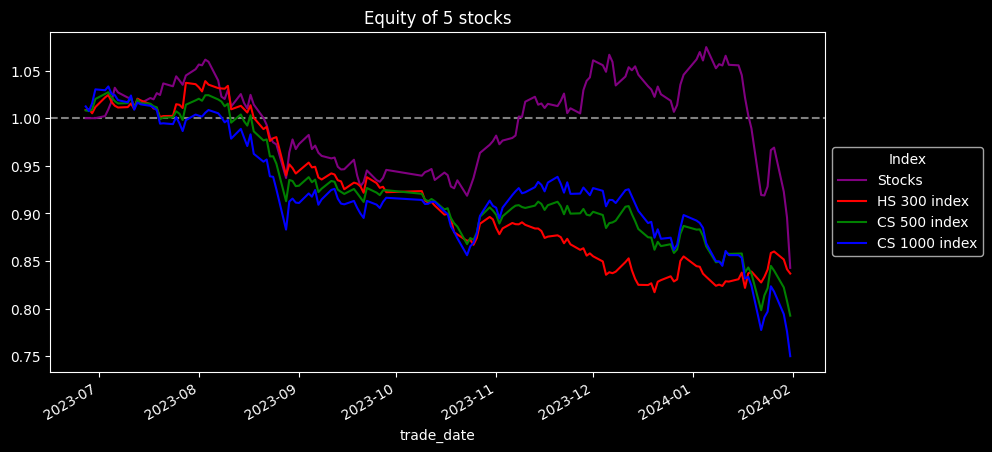

In [52]:
def Simple_Backtest(factor_df, stock_num):
    # Calculte the ranks of factors daily.
    factor_ranks = factor_df.rank(axis=1, ascending=False)
    
    # Create position_df based on top 3 ranks
    position_df = factor_ranks.apply(lambda x: x <= stock_num).astype(int)
    position_df = Ensure_position(position_df)

    # Delete 'Monday' to fit into yield dataframe.
    del position_df["Monday"]

    # Calculate the sum of each line in turn.
    stock_amount_sum = position_df.sum(axis=1)

    # Calculate the weight of each stock. (Average distribution at the same level)
    weight_allocation = position_df.apply(lambda x: x / stock_amount_sum, axis=0).fillna(0)

    # Calculate the daily profit rate. And prepare to calculate cumprod.
    profit = (weight_allocation * price_return_test).sum(axis=1)

    plt.rcParams['axes.unicode_minus'] = False # 正常显示负号
    plt.figure(figsize=(10, 5))
    plt.axhline(y=1, color='grey', linestyle='--')
    # Calculate the daily equity and draw.
    profit = profit.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
    profit.cumprod().plot(label='Stocks', legend=True, color='#800080')

    profit_HS300 = HS_300_test.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
    profit_HS300.cumprod().plot(label="HS 300 index", legend=True, color='r')
    profit_CS500 = CS_500_test.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
    profit_CS500.cumprod().plot(label="CS 500 index", legend=True, color='g')
    profit_CS1000 = CS_1000_test.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
    profit_CS1000.cumprod().plot(label="CS 1000 index", legend=True, color='b')

    plt.title(f"Equity of {stock_num} stocks")
    plt.legend(title='Index', bbox_to_anchor=(1, 0.5), loc='center left')
    plt.show()
Simple_Backtest(Ensemble_factor_df, 5)

### Indexes

1. RankIC mean(IC mean)
2. ICIR
3. IC winning rate
4. IC t-value
5. Long ROI
6. Long sharp
7. Long retracement
8. Long average weekly turnover rate

IC mean: -0.06790195738439422
ICIR: -0.5008108999148194


<Axes: >

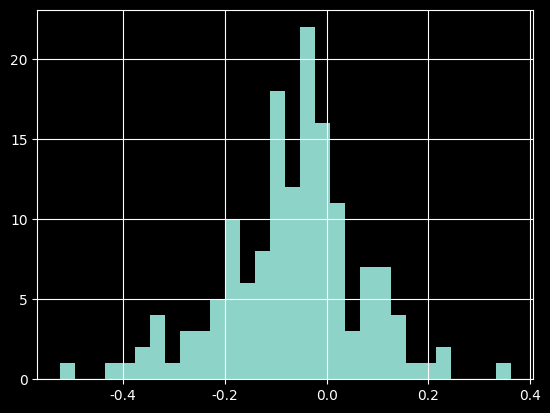

In [26]:
# ICIR
IC_series = Ensemble_factor_df.corrwith(price_return_test, 
                                   axis=1,
                                   method='spearman')
IC_mean = IC_series.mean()
print(f'IC mean: {IC_mean}')
ICIR = IC_series.mean() / IC_series.std()
print(f"ICIR: {ICIR}")
IC_series.hist(bins=30)

In [27]:
# IC winning rate
IC_winning_rate = sum(1 for ic in IC_series if ic > 0) / len(IC_series)
print(f"IC winning rate: {IC_winning_rate}")

IC winning rate: 0.26666666666666666


In [28]:
t_value = ICIR / sqrt(len(IC_series))
print(f"IC t-value: {t_value}")

IC t-value: -0.04089103874717877


In [29]:
# Long (Except Short), so `profit_long * 2`
# profit_long is long equity series.
Long_equity = profit_long * 2
Long_ROI = (Long_equity[-1]) - 1
print(f"Long ROI: {Long_ROI}")

# Max Drawdown
# Calculate the previous peaks
previous_peaks = Long_equity.cummax()
# Calculate the drawdowns
drawdowns = (Long_equity - previous_peaks) / previous_peaks

# Find the maximum drawdown and the dates associated with it
# Convert the index labels to a numeric format
drawdowns.index = pd.to_numeric(drawdowns.index)
max_drawdown = drawdowns.min()
print(f'Max drawdown: {max_drawdown}')
max_drawdown_start = drawdowns.idxmin()

# Convert the start and end dates back to the original format if needed
max_drawdown_start = pd.to_datetime(max_drawdown_start).date()
print(f"Max drawdown begin date: {max_drawdown_start}")

Long ROI: -0.11219578636100336
Max drawdown: -0.12369567796059301
Max drawdown begin date: 2023-10-23
